In [470]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [471]:
conf = !python  parameters.py

In [472]:
configs = eval(conf[0])

In [558]:
## Experiment config
configs.name="E500"
configs.n_devices=499
configs.n_jobs=6

In [559]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)

# DRL - average all samples

In [560]:
## previou eval_trained_PF_ppo.py
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)


In [561]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost"]
df

,model,sample,time,cost,reward,iTime,iCost
0,1000,0,113.0,676.0,-113.0,322.0,720.0
1,1000,1,117.0,815.0,-117.0,372.0,720.0
2,1000,2,125.0,825.0,-125.0,322.0,720.0
3,1000,3,109.0,647.0,-109.0,372.0,720.0
4,1000,4,113.0,819.0,-113.0,272.0,720.0
...,...,...,...,...,...,...,...
145,0100,25,1016.0,36.0,-36.0,272.0,720.0
146,0100,26,1036.0,36.0,-36.0,322.0,720.0
147,0100,27,1096.0,36.0,-36.0,322.0,720.0
148,0100,28,1128.0,45.0,-45.0,322.0,720.0


In [562]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean})
dfmodel

,time,cost
model,,
0100,953.733337,44.200001
1000,114.833336,702.200012
2575,251.066666,38.400002
5050,137.800003,74.366669
7525,112.166664,84.099998


In [563]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [564]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

0100
953.73334
1000
114.833336
2575
251.06667
5050
137.8
7525
112.166664


0100
1000
2575
5050
7525


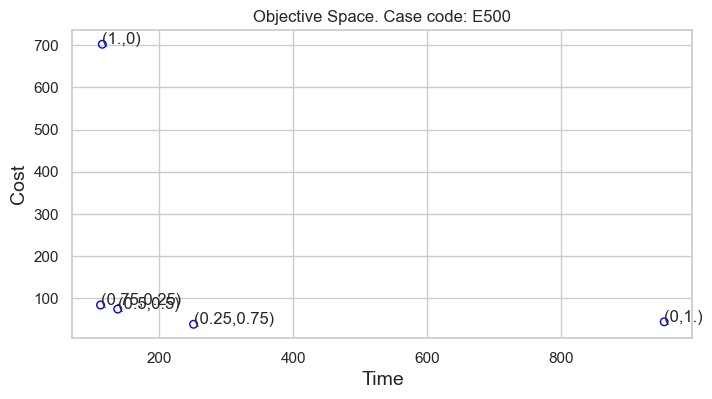

In [565]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [566]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(5, 2)

In [567]:
avg_pf

array([[953.73334 ,  44.2     ],
       [114.833336, 702.2     ],
       [251.06667 ,  38.4     ],
       [137.8     ,  74.36667 ],
       [112.166664,  84.1     ]], dtype=float32)

In [568]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 328911.93373287626


# DRL one sample

In [569]:
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,1000,0,113.0,676.0,-113.0,322.0,720.0
1,1000,1,117.0,815.0,-117.0,372.0,720.0
2,1000,2,125.0,825.0,-125.0,322.0,720.0
3,1000,3,109.0,647.0,-109.0,372.0,720.0
4,1000,4,113.0,819.0,-113.0,272.0,720.0


In [573]:
CASE = 0 
dfDRL = df[df.case==CASE]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,1000,0,113.0,676.0,-113.00,322.0,720.0
30,7525,0,110.0,63.0,-98.25,322.0,720.0
60,5050,0,148.0,91.0,-119.50,322.0,720.0
90,2575,0,212.0,36.0,-80.00,322.0,720.0
120,0100,0,823.0,36.0,-36.00,322.0,720.0


In [571]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values)).T
avg_pf

array([[113., 676.],
       [110.,  63.],
       [148.,  91.],
       [212.,  36.],
       [823.,  36.]], dtype=float32)

(113.0, 676.0)
1000
(110.0, 63.0)
7525
(148.0, 91.0)
5050
(212.0, 36.0)
2575
(823.0, 36.0)
0100


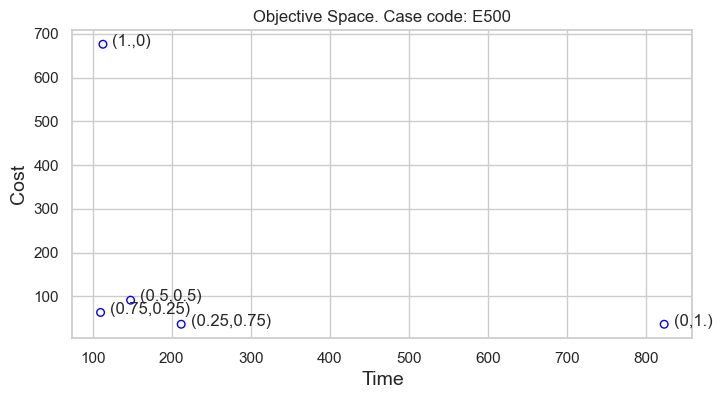

In [572]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')


for i in range(len(avg_pf)):
    print((avg_pf[i,0], avg_pf[i,1]))
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0]+12, avg_pf[i,1]-2.5))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA

In [528]:
df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df = pd.DataFrame(df)


In [529]:
df.columns = ["case","time","cost","executionTime"]
df.head()

,case,time,cost,executionTime
0,0,208.0,45.0,0 days 00:08:40
1,0,109.0,194.0,0 days 00:08:40
2,0,164.0,63.0,0 days 00:08:40
3,0,136.0,99.0,0 days 00:08:40
4,0,127.0,136.0,0 days 00:08:40


In [530]:
dfga = df[df.case==0]
dfga

,case,time,cost,executionTime
0,0,208.0,45.0,0 days 00:08:40
1,0,109.0,194.0,0 days 00:08:40
2,0,164.0,63.0,0 days 00:08:40
3,0,136.0,99.0,0 days 00:08:40
4,0,127.0,136.0,0 days 00:08:40
5,0,118.0,155.0,0 days 00:08:40
6,0,126.0,146.0,0 days 00:08:40
7,0,137.0,90.0,0 days 00:08:40
8,0,127.0,136.0,0 days 00:08:40
9,0,164.0,63.0,0 days 00:08:40


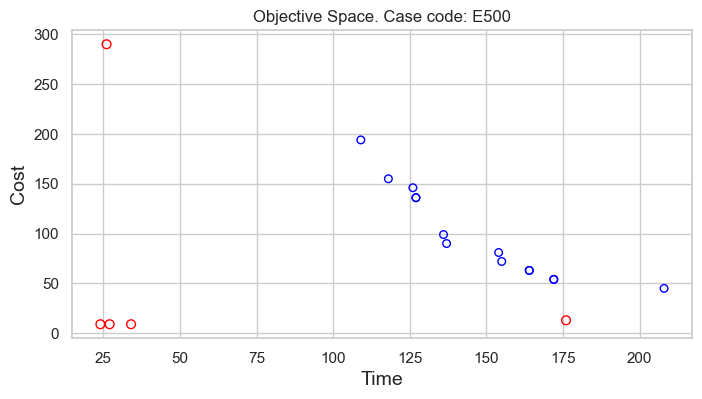

In [531]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue')
ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA + DRL

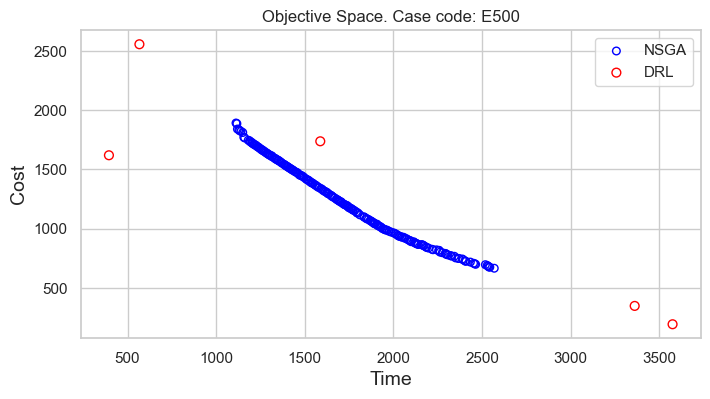

In [419]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [285]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [286]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  0.0


In [287]:
print("H - DRL ", ind(avg_pf)) 

H - DRL  48675.0


### Violin plot del PF según pesos del modelo DRL

In [420]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,1000,372.0,1620.0,0
50,7525,596.0,2500.0,0
100,5050,1561.0,1720.0,0
150,2575,3573.0,198.0,0
200,0100,3338.0,367.0,0


In [421]:
x = list(range(len(dtvio)))

In [422]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(.1,.0)', '(.7,.5)', '(.5,.0)', '(.2,.5)', '(.0,.1)'], dtype='<U7')

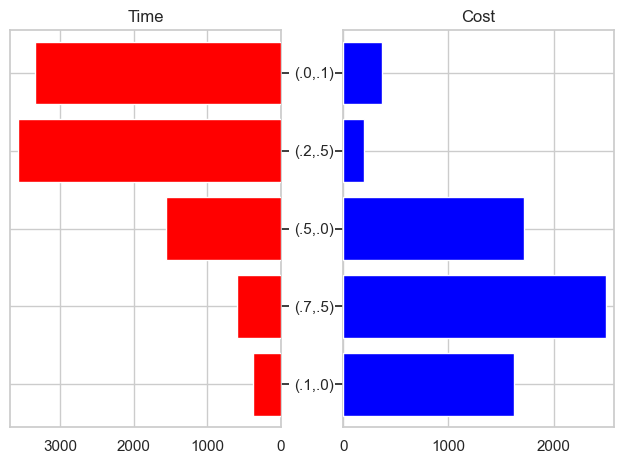

In [423]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [292]:
dtvio.model

0      1000
50     7525
100    5050
150    2575
200    0100
Name: model, dtype: object

In [293]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['0100', '1000', '2575', '5050', '7525'], dtype='object', name='model')


In [294]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (11,) and arg 3 with shape (5,).

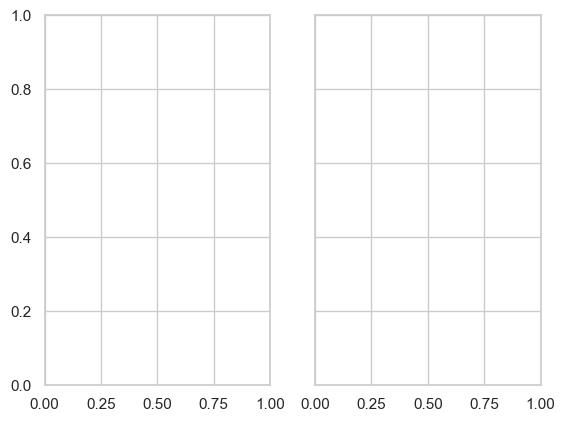

In [295]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

# GA MONO

In [479]:
weigthRange = list(np.arange(0,11,2.5))
combinationsWeightTC = list(zip(weigthRange,weigthRange[::-1])) #[(0, 10), (1, 9), (2, 8), (3, 7), (4, 6), (5, 5), (6, 4), (7, 3), (8, 2), (9, 1), (10, 0)]
allCombination = combinationsWeightTC
allCombination

combinations = ["0100","2575","5050","7525","1000"]
combinations


['0100', '2575', '5050', '7525', '1000']

In [519]:
dall = pd.DataFrame([],columns= ["case","time","cost","constraing","exec","model"])
for combi in combinations:
    print("w%s"%combi)
    df = pd.read_pickle('logs/log_ga_pf_mono_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w%s.pkl'%combi, 'infer')
    df = pd.DataFrame(df)
    df.columns = ["case","time","cost","constraing","exec"]
    df=df[:1]
    df["model"]=[combi]*len(df)
    print("\t",df.shape)
    dall = pd.concat([dall, df], axis=0)
    
dall.shape
dall.head()

w0100
	 (1, 6)
w2575
	 (1, 6)
w5050
	 (1, 6)
w7525
	 (1, 6)
w1000
	 (1, 6)


,case,time,cost,constraing,exec,model
0,0,1168.0,36.0,0,0 days 00:02:25,0100
0,0,143.0,36.0,0,0 days 00:03:29,2575
0,0,105.0,54.0,0,0 days 00:03:29,5050
0,0,111.0,128.0,0,0 days 00:03:12,7525
0,0,108.0,724.0,0,0 days 00:02:39,1000


In [520]:
dmono = dall.groupby("model").sample(frac=1)
dmono

,case,time,cost,constraing,exec,model
0,0,1168.0,36.0,0,0 days 00:02:25,0100
0,0,108.0,724.0,0,0 days 00:02:39,1000
0,0,143.0,36.0,0,0 days 00:03:29,2575
0,0,105.0,54.0,0,0 days 00:03:29,5050
0,0,111.0,128.0,0,0 days 00:03:12,7525


[Text(0.5, 1.0, 'Mono values')]

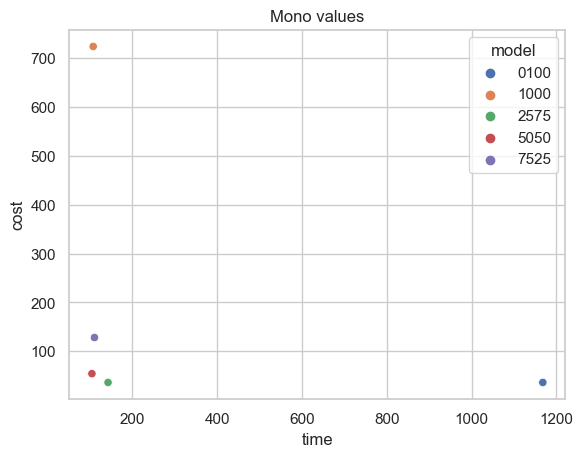

In [522]:
import seaborn as sns

sns.scatterplot(
    data=dmono,
    x="time", y="cost",
    hue="model", 

).set(title='Mono values')

0100
1000
2575
5050
7525


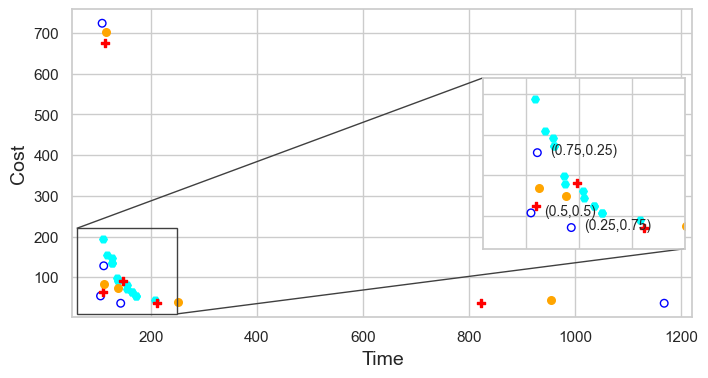

In [576]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig, ax = plt.subplots(figsize=(8,4))

axins1 = zoomed_inset_axes(ax, zoom = 2, loc='center right')
axins1.scatter(dmono.time, dmono.cost, s=30, facecolors='none', edgecolors='blue') #MONO solutions
axins1.scatter(dfga.time, dfga.cost, s=30, facecolors='cyan', marker="H" ,edgecolors='cyan') ## PF
axins1.tick_params(labelleft=False, labelbottom=False)
axins1.scatter(dfDRL.time, dfDRL.cost, s=35, facecolors='red', marker="P" ,edgecolors='red') ## PF
axins1.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='orange', edgecolors='orange')

for i in range(len(avg_pf)):
    # print((avg_pf[i,0], avg_pf[i,1]))
    axins1.annotate(getWeithDecomposition(dmono.iloc[i].model), (dmono.iloc[i].time+12, dmono.iloc[i].cost-2.5),fontsize=10)


#axins1.plot(y,datapts.T,'mo')
x1, x2, y1, y2 = 60,250,10,220 
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)


ax.scatter(dmono.time, dmono.cost, s=30, facecolors='none', edgecolors='blue') #MONO solutions
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='cyan', marker="H" ,edgecolors='cyan') ## PF
ax.scatter(dfDRL.time, dfDRL.cost, s=35, facecolors='red', marker="P" ,edgecolors='red') ## PF
ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='orange', edgecolors='orange')

mark_inset(ax, axins1, loc1=2, loc2=4, fc="none", ec=".25")
# plt.title("Mono GA ")
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [475]:
df = pd.read_pickle('logs/log_ga_pf_mono_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w5050.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["case","time","cost","constraing","exec"]
df

,case,time,cost,constraing,exec
0,0,105.0,54.0,0,0 days 00:03:29
1,0,105.0,54.0,0,0 days 00:03:29
2,0,105.0,54.0,0,0 days 00:03:29
3,0,105.0,54.0,0,0 days 00:03:29
4,0,105.0,54.0,0,0 days 00:03:29
...,...,...,...,...,...
83,0,105.0,54.0,0,0 days 00:03:29
84,0,105.0,54.0,0,0 days 00:03:29
85,0,105.0,54.0,0,0 days 00:03:29
86,0,105.0,54.0,0,0 days 00:03:29


In [469]:
dfDRL = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
dfDRL = pd.DataFrame(dfDRL)
dfDRL.columns = ["model","case","time","cost","reward","iTime","iCost"]
dt = dfDRL[dfDRL.model=="5050"]
dt["reward2"] = dt.time*0.5+(dt.cost*(0.5/3))
dt

FileNotFoundError: [Errno 2] No such file or directory: 'logs/log_eval_PF_default_3_9.pkl'